In [1]:
import pandas as pd  
import numpy as np
import matplotlib.pyplot as plt
import re
import string
import nltk
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
nltk.download('stopwords')
stop = stopwords.words('english')
from wordcloud import WordCloud, STOPWORDS 

[nltk_data] Downloading package stopwords to
[nltk_data]     /home/dilawer/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [2]:
cols = ['label','id','date','query','user','tweet']
df = pd.read_csv("data.csv",encoding="ISO-8859-1",header=None, names=cols)
df.head()

,label,id,date,query,user,tweet
0,0,1467810369,Mon Apr 06 22:19:45 PDT 2009,NO_QUERY,_TheSpecialOne_,"@switchfoot http://twitpic.com/2y1zl - Awww, t..."
1,0,1467810672,Mon Apr 06 22:19:49 PDT 2009,NO_QUERY,scotthamilton,is upset that he can't update his Facebook by ...
2,0,1467810917,Mon Apr 06 22:19:53 PDT 2009,NO_QUERY,mattycus,@Kenichan I dived many times for the ball. Man...
3,0,1467811184,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,ElleCTF,my whole body feels itchy and like its on fire
4,0,1467811193,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,Karoli,"@nationwideclass no, it's not behaving at all...."


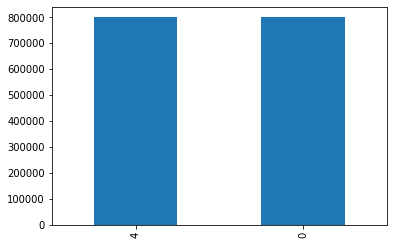

In [3]:
df['label'].value_counts().plot.bar()

In [4]:
df.drop(['id','query','user'],axis=1,inplace=True)
df.head()

,label,date,tweet
0,0,Mon Apr 06 22:19:45 PDT 2009,"@switchfoot http://twitpic.com/2y1zl - Awww, t..."
1,0,Mon Apr 06 22:19:49 PDT 2009,is upset that he can't update his Facebook by ...
2,0,Mon Apr 06 22:19:53 PDT 2009,@Kenichan I dived many times for the ball. Man...
3,0,Mon Apr 06 22:19:57 PDT 2009,my whole body feels itchy and like its on fire
4,0,Mon Apr 06 22:19:57 PDT 2009,"@nationwideclass no, it's not behaving at all...."


In [5]:
df['date'] = pd.to_datetime(df['date'])

/home/dilawer/anaconda3/lib/python3.7/site-packages/dateutil/parser/_parser.py:1206: UnknownTimezoneWarning: tzname PDT identified but not understood.  Pass `tzinfos` argument in order to correctly return a timezone-aware datetime.  In a future version, this will raise an exception.
  category=UnknownTimezoneWarning)


KeyboardInterrupt: 

In [6]:
df.dtypes

label     int64
date     object
tweet    object
dtype: object

In [7]:
df["tweet"] = df["tweet"].str.lower()

In [8]:
regex = "@\S+|https?:\S+|http?:\S|[^A-Za-z0-9]+" #regex seen from internet 
def preprocess(text):
    # Remove link,user and special characters
    text = re.sub(regex, ' ', str(text).lower()).strip()
    tokens = []
    for token in text.split():
      tokens.append(token)
    return " ".join(tokens)
df['tweet'] = df['tweet'].apply(preprocess)

In [9]:
df.head()

,label,date,tweet
0,0,Mon Apr 06 22:19:45 PDT 2009,awww that s a bummer you shoulda got david car...
1,0,Mon Apr 06 22:19:49 PDT 2009,is upset that he can t update his facebook by ...
2,0,Mon Apr 06 22:19:53 PDT 2009,i dived many times for the ball managed to sav...
3,0,Mon Apr 06 22:19:57 PDT 2009,my whole body feels itchy and like its on fire
4,0,Mon Apr 06 22:19:57 PDT 2009,no it s not behaving at all i m mad why am i h...


In [10]:
def remove_punctuations(text):
    for punctuation in string.punctuation:
        text = text.replace(punctuation, '')
    return text
df["tweet"] = df["tweet"].apply(remove_punctuations)

In [11]:
def check_weird_symbols(text):
  printable = string.printable
  symbols = []
  for lines in text:
    for chars in lines:
      if chars not in printable:
        symbols.append(chars)
  return list(set(symbols))
stop.append("user")


In [12]:
#removing stop words
df['tweet'] = df['tweet'].apply(lambda x: ' '.join([item for item in x.split() if item not in stop]))

In [13]:
porter = PorterStemmer()
def stem_sentences(sentence):
    tokens = sentence.split()
    stemmed_tokens = [porter.stem(token) for token in tokens]
    return ' '.join(stemmed_tokens)


In [14]:
#stemming
df['tweet'] = df['tweet'].apply(stem_sentences)

In [15]:
#checking for NA values in data
df.isna().sum().sum() #if there is even a single missing value it should be a number other than zero

0

In [16]:
df['label'] = df['label'].apply(lambda x: 1 if x==4 else 0 )

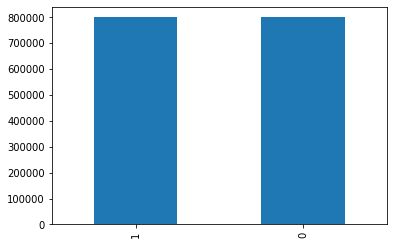

In [17]:
df['label'].value_counts().plot.bar()

In [18]:
df['tweet'] = df['tweet'].apply(preprocess)

In [19]:
df[df['label'] == 0].head(10)

,label,date,tweet
0,0,Mon Apr 06 22:19:45 PDT 2009,awww bummer shoulda got david carr third day
1,0,Mon Apr 06 22:19:49 PDT 2009,upset updat facebook text might cri result sch...
2,0,Mon Apr 06 22:19:53 PDT 2009,dive mani time ball manag save 50 rest go bound
3,0,Mon Apr 06 22:19:57 PDT 2009,whole bodi feel itchi like fire
4,0,Mon Apr 06 22:19:57 PDT 2009,behav mad see
5,0,Mon Apr 06 22:20:00 PDT 2009,whole crew
6,0,Mon Apr 06 22:20:03 PDT 2009,need hug
7,0,Mon Apr 06 22:20:03 PDT 2009,hey long time see ye rain bit bit lol fine thank
8,0,Mon Apr 06 22:20:05 PDT 2009,nope
9,0,Mon Apr 06 22:20:09 PDT 2009,que muera


In [20]:
df[df['label'] == 1].head(10)

,label,date,tweet
800000,1,Mon Apr 06 22:22:45 PDT 2009,love health4uandpet u guy r best
800001,1,Mon Apr 06 22:22:45 PDT 2009,im meet one besti tonight cant wait girl talk
800002,1,Mon Apr 06 22:22:46 PDT 2009,thank twitter add sunisa got meet hin show dc ...
800003,1,Mon Apr 06 22:22:46 PDT 2009,sick realli cheap hurt much eat real food plu ...
800004,1,Mon Apr 06 22:22:46 PDT 2009,effect everyon
800005,1,Mon Apr 06 22:22:47 PDT 2009,tell burst laugh realli loud thank make come sulk
800006,1,Mon Apr 06 22:22:51 PDT 2009,than respons ihad alreadi find answer
800007,1,Mon Apr 06 22:22:48 PDT 2009,jealou hope great time vega like acm love show
800008,1,Mon Apr 06 22:22:49 PDT 2009,ah congrat mr fletcher final join twitter
800009,1,Mon Apr 06 22:22:49 PDT 2009,respond stupid cat help type forgiv error


In [23]:
wc_tweets = df["tweet"]

0               awww bummer shoulda got david carr third day
1          upset updat facebook text might cri result sch...
2            dive mani time ball manag save 50 rest go bound
3                            whole bodi feel itchi like fire
4                                              behav mad see
                                 ...                        
1599995                           woke school best feel ever
1599996              thewdb com cool hear old walt interview
1599997                         readi mojo makeov ask detail
1599998    happi 38th birthday boo alll time tupac amaru ...
1599999    happi charitytuesday thenspcc sparkschar speak...
Name: tweet, Length: 20000, dtype: object

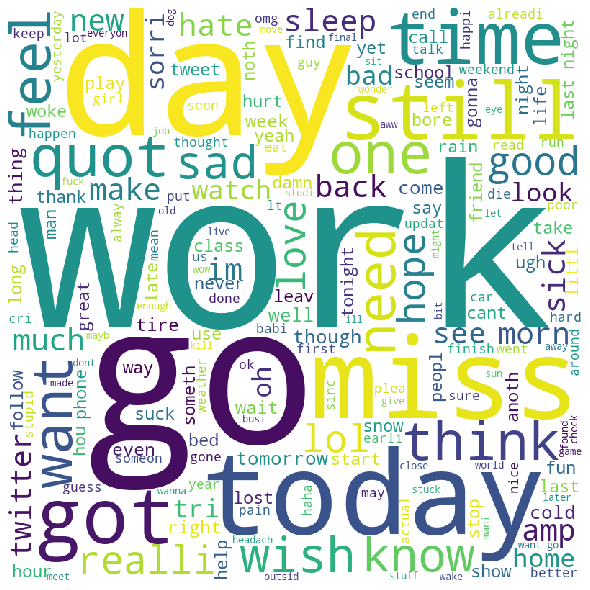

In [29]:
#Code taken from WordCloud library site
comment_words = ' '
stopwords = set(STOPWORDS) 
for val in wc_tweets: 
      
    # typecaste each val to string 
    val = str(val) 
  
    # split the value 
    tokens = val.split() 
      
    # Converts each token into lowercase 
    for i in range(len(tokens)): 
        tokens[i] = tokens[i].lower() 
          
    for words in tokens: 
      comment_words = comment_words + words + ' '
  
  
wordcloud = WordCloud(width = 800, height = 800, 
                background_color ='white', 
                stopwords = stopwords, 
                min_font_size = 10).generate(comment_words) 
  
# plot the WordCloud image                        
plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 
  
plt.show() 

In [30]:
df.to_pickle("./cleanedSentiment140.pkl")